In [115]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import sys
from src.modules import conf, fit, spec, evl, pred
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
%matplotlib inline
sns.set(style='ticks')
plt.rcParams['figure.figsize'] = [24, 8]
plt.rcParams['figure.dpi']

100.0

In [118]:
data = fit.load_pcls(
        conf["Athlete"]["name"],
        conf["Athlete"]["activity_type"],
        conf["Paths"]["pcl"],
    )

100%|██████████| 361/361 [00:00<00:00, 426.21it/s]


In [119]:
from src.heuristics import random_shooting
from src.heuristics import genetic_optimization

In [120]:
r_cross = conf['GO']['r_cross']
r_mut = conf['GO']['r_mut']

In [147]:
train_df, test_df = fit.get_train_test_df(data,ratio=0.8)
print(len(train_df),len(test_df))
test_df, valid_df = fit.get_test_valid_df(test_df)
print(len(train_df),len(test_df),len(valid_df))
valid_df = data[fit.get_race_index(data, '2022-10-08-11-18')]
speed = valid_df.enhanced_speed
valid_df.drop('enhanced_speed',axis=1,inplace=True)

543615 135574
543615 132192 3382


In [133]:
_,_,rmse,cols, nrmse = random_shooting.random_shoot(
                          train_df=train_df,
                          test_df=test_df,
                          hmax=5,
                          endog='enhanced_speed',
                          )
np.min(rmse)

100%|██████████| 5/5 [00:08<00:00,  1.67s/it]


1.6801741271191493

In [129]:
full_cols = [x for x in train_df.columns if 'enhanced_speed' not in x]

In [124]:
# sorted_cols = [x for _, x in sorted(zip(rmse, cols))]
# best, best_eval = genetic_optimization.genetic_algorithm(1, r_cross,r_mut ,sorted_cols,train_df,test_df,full_cols,'enhanced_speed')

2.2715836243118397


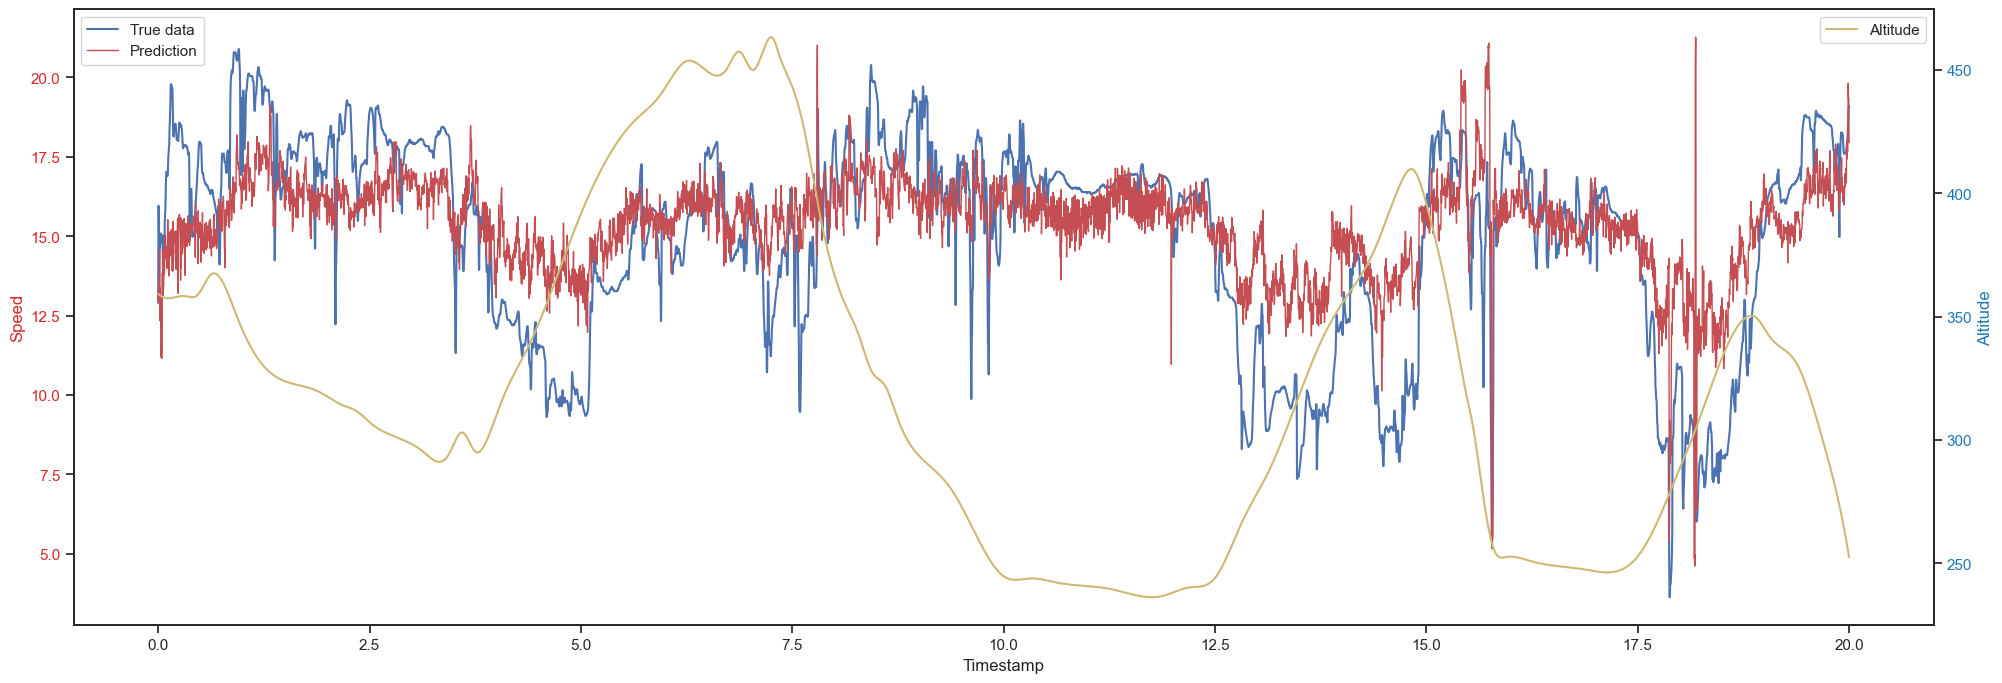

In [148]:
form = random_shooting.get_form(list(cols[rmse.index(np.min(rmse))]),endog='enhanced_speed')
result = spec.ols_form(train_df, form)
pred_ols = pred.predict(valid_df, result)
print(evl.rmse(speed,pred_ols))
fig = evl.plot(df=valid_df,pred=pred_ols,endog='enhanced_speed',true_data=speed)